In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = r'Dataset\heart.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()  # Drop rows with missing values (or use imputation if necessary)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

In [3]:
for x in data.select_dtypes(include=['object']).columns:
    print(x)  
    print(data[x].value_counts().idxmax())
    print('==================')

Sex
M
ChestPainType
ASY
RestingECG
Normal
ExerciseAngina
N
ST_Slope
Flat


In [4]:
for x in data.select_dtypes(include=['int64', 'float64']).columns:
    print(x)  # Print column name
    print(data[x].mean())  # Print mean value of the column
    print('==================')

Age
53.510893246187365
RestingBP
132.39651416122004
Cholesterol
198.7995642701525
FastingBS
0.23311546840958605
MaxHR
136.80936819172112
Oldpeak
0.8873638344226579
HeartDisease
0.5533769063180828


In [5]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
# data["Age_Group"] = pd.cut(data["Age"], bins=[18, 30, 45, 60, 80], labels=[1, 2, 3, 4])
# data["Oldpeak_Squared"] = data["Oldpeak"] ** 2
# data["Age_Cholesterol_Interaction"] = data["Cholesterol"] / data["Age"]
# data["MaxHR_Cholesterol_Interaction"] = data["Cholesterol"] * data["MaxHR"]

In [7]:
numerical_features = list(data.select_dtypes(include=['float64', 'int64']).columns)
numerical_features.remove('HeartDisease')

In [10]:
scaler = StandardScaler()
scaler.fit(data[numerical_features])

StandardScaler()

In [19]:
import joblib
joblib.dump(scaler, r'models\scaler.pkl')

['models\\scaler.pkl']

In [14]:
dummy_row = pd.DataFrame([np.random.rand(len(numerical_features)) * 100], columns=numerical_features)

In [15]:
dummy_row

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Oldpeak_Squared,Age_Cholesterol_Interaction,MaxHR_Cholesterol_Interaction
0,38.047741,53.766532,42.951149,28.478477,51.053974,43.308883,32.889767,60.764335,57.414497


In [16]:
a = scaler.transform(dummy_row)

In [17]:
print(a)

[[-1.64022161 -4.24933507 -1.42555733 66.80309849 -3.37003198 39.79545449
   8.90622269 24.90999194 -1.71859715]]


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            918 non-null    float64 
 1   Sex                            918 non-null    object  
 2   ChestPainType                  918 non-null    object  
 3   RestingBP                      918 non-null    float64 
 4   Cholesterol                    918 non-null    float64 
 5   FastingBS                      918 non-null    float64 
 6   RestingECG                     918 non-null    object  
 7   MaxHR                          918 non-null    float64 
 8   ExerciseAngina                 918 non-null    object  
 9   Oldpeak                        918 non-null    float64 
 10  ST_Slope                       918 non-null    object  
 11  HeartDisease                   918 non-null    int64   
 12  Age_Group                      918 n

In [83]:
categorical_cols = [col for col in data.columns if data[col].dtype == "object"]
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [84]:
df = data

In [85]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [86]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [87]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [88]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [89]:
df["Age_Group"].unique()

[2, 3, 4, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

In [90]:
def one_hot_encode_nominal(df, include=[]):
    # Ensure included columns exist and are categorical
    categorical_cols = [col for col in include if col in df.columns and df[col].dtype == "object"]
    
    # Apply one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

In [91]:
# - If you're working with the raw measurements, it's treated as continuous data (e.g., cholesterol level in mg/dL, EKG waveform values).
# - If it's already categorized (e.g., "healthy" vs. "unhealthy"), it's nominal—because once binned, there's no inherent numeric progression.
# - If the categories indicate severity levels, like EKG results being "normal," "borderline abnormal," and "abnormal," then it could be ordinal, since there's a logical order.

nominal_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
data_encoded = one_hot_encode_nominal(data, include=nominal_cols)


In [92]:
ordinal_cols = [col for col in data.columns if col not in nominal_cols and data[col].dtype == "object"]
ordinal_cols.append("Age_Group")
ordinal_cols

['ST_Slope', 'Age_Group']

In [93]:
ordinal_scale = []

for col in ordinal_cols:
    unique_values = data[col].unique()
    ordinal_scale.append((col, unique_values))

In [94]:
ordinal_scale

[('ST_Slope', array(['Up', 'Flat', 'Down'], dtype=object)),
 ('Age_Group',
  [2, 3, 4, 1]
  Categories (4, int64): [1 < 2 < 3 < 4])]

In [95]:
# encoder = OrdinalEncoder(categories=[["never", "past", "current"]])
# data["smoking_status_encoded"] = encoder.fit_transform(data[["smoking_status"]])

# OR

ST_Slope_mapping = {"Down": 1, "Flat": 2, "Up": 3}

In [96]:
data_encoded["ST_Slope"] = data_encoded["ST_Slope"].map(ST_Slope_mapping)


In [97]:
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Age_Group,Oldpeak_Squared,Age_Cholesterol_Interaction,MaxHR_Cholesterol_Interaction,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,3,0,2,-0.553294,1.463847,1.351225,True,True,False,False,True,False,False
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,2,1,3,-0.265682,-0.091453,0.013998,False,False,True,False,True,False,False
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,3,0,2,-0.553294,1.649373,-0.007395,True,True,False,False,False,True,False
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,2,1,3,0.093834,0.252258,-0.293166,False,False,False,False,True,False,True
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,3,0,3,-0.553294,-0.118761,-0.251246,True,False,True,False,True,False,False


In [98]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            918 non-null    float64 
 1   RestingBP                      918 non-null    float64 
 2   Cholesterol                    918 non-null    float64 
 3   FastingBS                      918 non-null    float64 
 4   MaxHR                          918 non-null    float64 
 5   Oldpeak                        918 non-null    float64 
 6   ST_Slope                       918 non-null    int64   
 7   HeartDisease                   918 non-null    int64   
 8   Age_Group                      918 non-null    category
 9   Oldpeak_Squared                918 non-null    float64 
 10  Age_Cholesterol_Interaction    918 non-null    float64 
 11  MaxHR_Cholesterol_Interaction  918 non-null    float64 
 12  Sex_M                          918 n

In [99]:
# categorical_cols =['gender',
#                     'region',
#                     'income_level',
#                     'hypertension',
#                     'diabetes',
#                     'obesity',
#                     'family_history',
#                     'smoking_status',
#                     'alcohol_consumption',
#                     'physical_activity',
#                     'dietary_habits',
#                     'air_pollution_exposure',
#                     'stress_level',
#                     'EKG_results',
#                     'previous_heart_disease',
#                     'medication_usage',
#                     'participated_in_free_screening',
#                     'heart_attack']

In [100]:
data_continuous = data.drop(columns=nominal_cols)
data_continuous.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Age_Group,Oldpeak_Squared,Age_Cholesterol_Interaction,MaxHR_Cholesterol_Interaction
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,Up,0,2,-0.553294,1.463847,1.351225
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,Flat,1,3,-0.265682,-0.091453,0.013998
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,Up,0,2,-0.553294,1.649373,-0.007395
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,Flat,1,3,0.093834,0.252258,-0.293166
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,Up,0,3,-0.553294,-0.118761,-0.251246


In [101]:
print(data_continuous.isnull().sum())  # Shows count of missing values per column
print(data_continuous.isna().sum())    # Alternative way to check for missing values

Age                              0
RestingBP                        0
Cholesterol                      0
FastingBS                        0
MaxHR                            0
Oldpeak                          0
ST_Slope                         0
HeartDisease                     0
Age_Group                        0
Oldpeak_Squared                  0
Age_Cholesterol_Interaction      0
MaxHR_Cholesterol_Interaction    0
dtype: int64
Age                              0
RestingBP                        0
Cholesterol                      0
FastingBS                        0
MaxHR                            0
Oldpeak                          0
ST_Slope                         0
HeartDisease                     0
Age_Group                        0
Oldpeak_Squared                  0
Age_Cholesterol_Interaction      0
MaxHR_Cholesterol_Interaction    0
dtype: int64


In [102]:
data_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            918 non-null    float64 
 1   RestingBP                      918 non-null    float64 
 2   Cholesterol                    918 non-null    float64 
 3   FastingBS                      918 non-null    float64 
 4   MaxHR                          918 non-null    float64 
 5   Oldpeak                        918 non-null    float64 
 6   ST_Slope                       918 non-null    object  
 7   HeartDisease                   918 non-null    int64   
 8   Age_Group                      918 non-null    category
 9   Oldpeak_Squared                918 non-null    float64 
 10  Age_Cholesterol_Interaction    918 non-null    float64 
 11  MaxHR_Cholesterol_Interaction  918 non-null    float64 
dtypes: category(1), float64(9), int64(1)

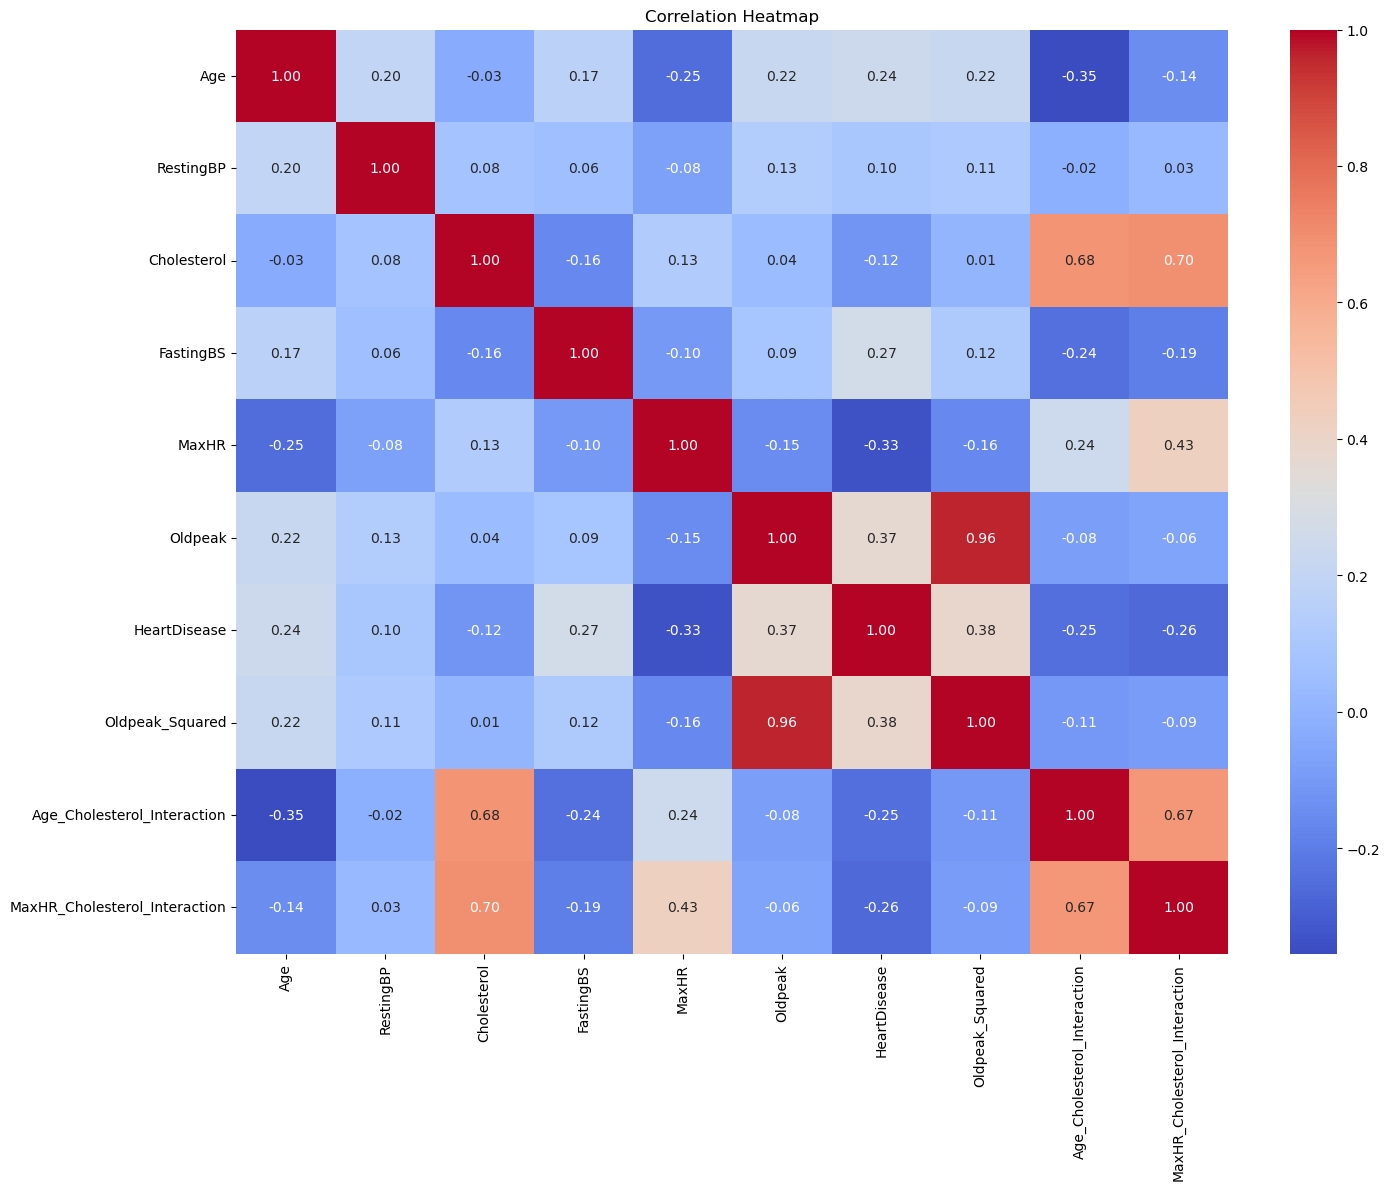

In [103]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
numerical_features = data_continuous.select_dtypes(include=["int64", "float64"])
corr_matrix = numerical_features.corr(method='kendall')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [104]:
filtered_corr = corr_matrix["HeartDisease"][abs(corr_matrix["HeartDisease"]) > 0.25]
filtered_columns = filtered_corr.index.tolist()
print(filtered_columns)

['FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Oldpeak_Squared', 'MaxHR_Cholesterol_Interaction']


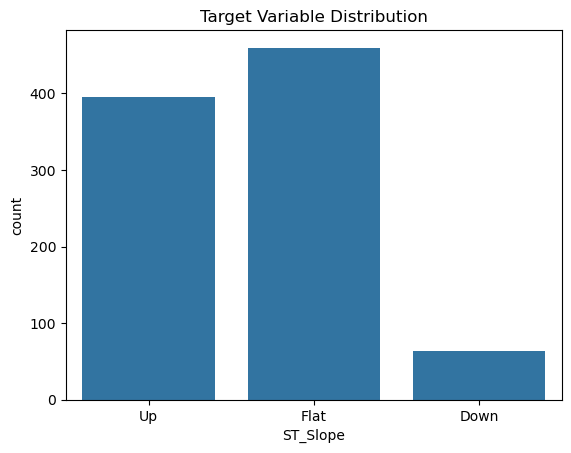

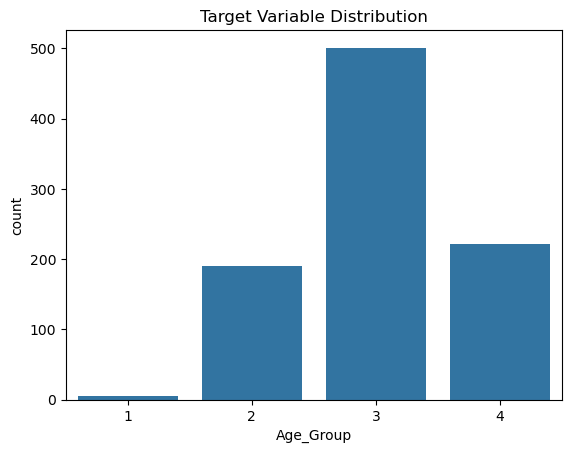

In [105]:
# Distribution of target variable
for col in ordinal_cols:
    target_column = col  
    sns.countplot(x=target_column, data=data)
    plt.title('Target Variable Distribution')
    plt.show()

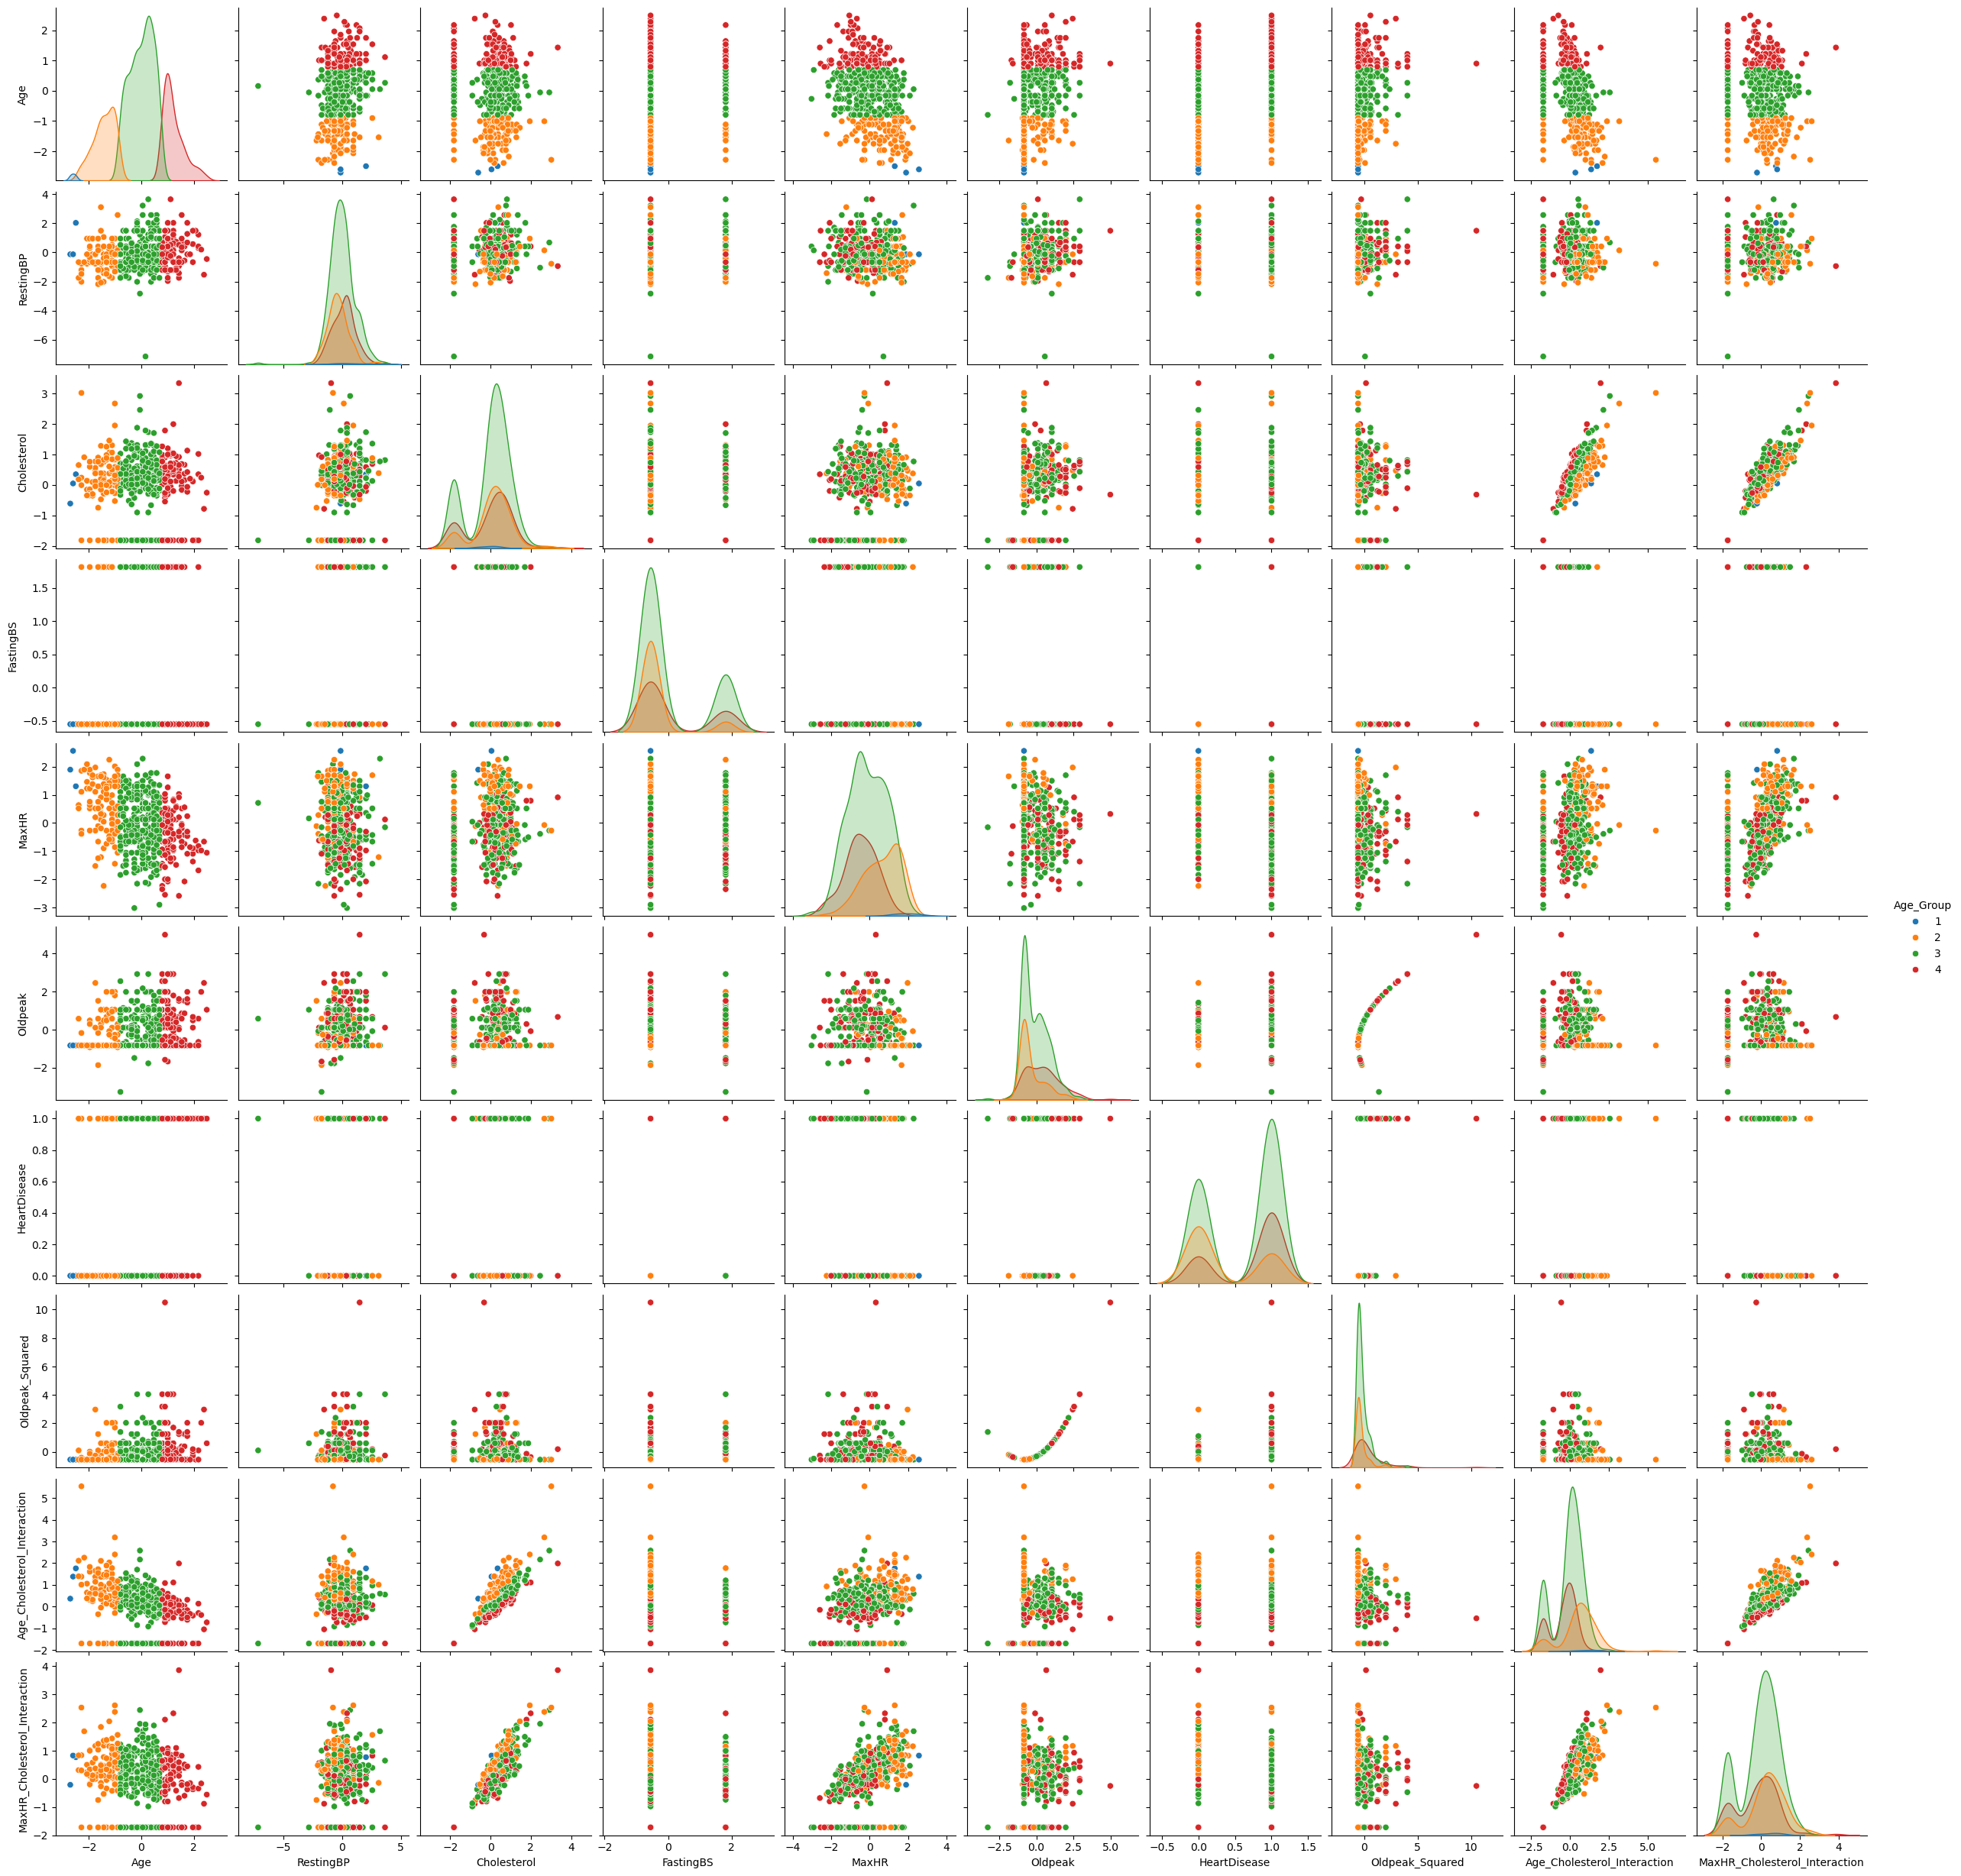

In [106]:
# Pairplot for numerical features
sampled_data = data.sample(500, random_state=42)
sns.pairplot(sampled_data, hue=target_column, diag_kind="kde")
plt.show()

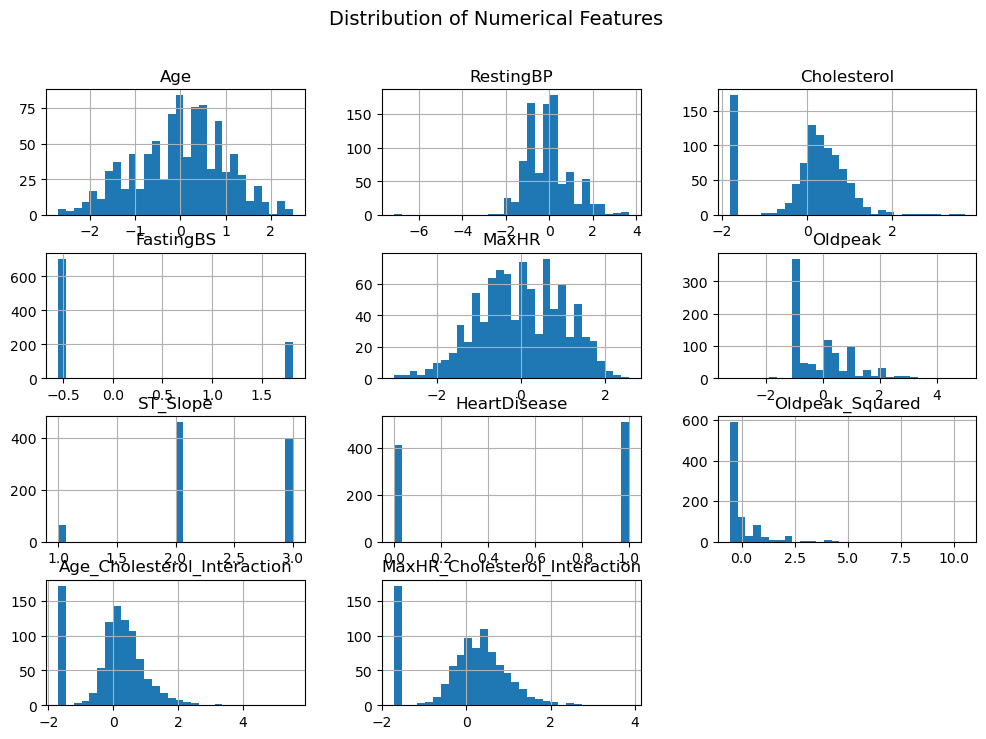

In [107]:
numerical_columns = data_encoded.select_dtypes(include=['number']).columns

# Plot histograms
data_encoded[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


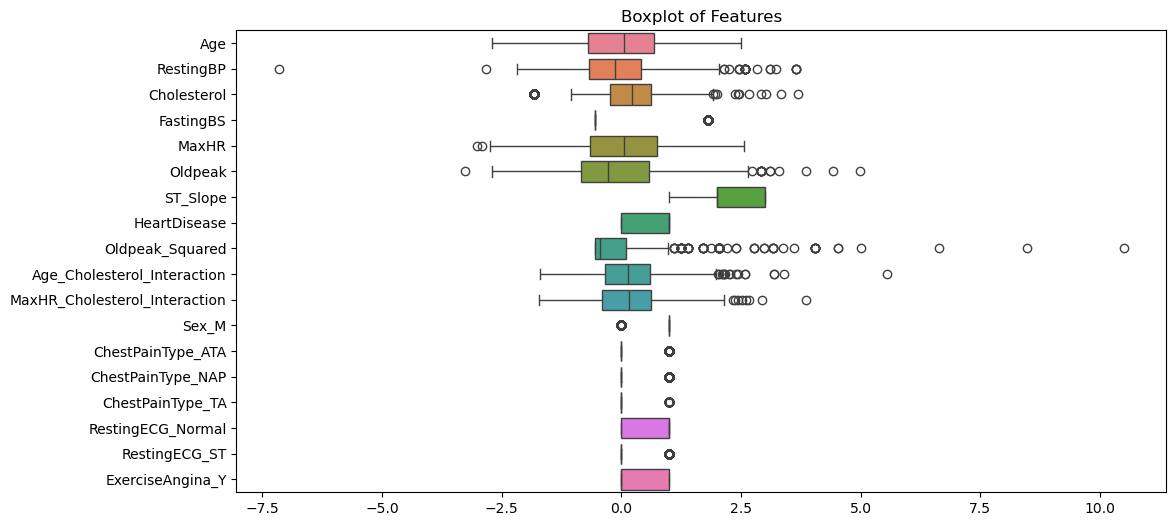

In [108]:
# Boxplot for feature analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_encoded, orient='h')
plt.title('Boxplot of Features')
plt.show()

In [109]:
# Save the cleaned and normalized dataset
cleaned_file_path = 'Dataset\cleaned_heart_failure_dataset_v3.csv'
data_encoded.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to Dataset\cleaned_heart_failure_dataset_v3.csv
